In [7]:
import pandas as pd  # pour la manipulation et l’analyse de données
import numpy as np  # pour les opérations numériques
from datetime import datetime  # pour manipuler les dates et heures
from sklearn.preprocessing import StandardScaler  # pour normaliser les données
from sklearn.model_selection import train_test_split  # pour diviser les données en train et test
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings  # pour gérer les messages d'avertissement
warnings.filterwarnings('ignore')  # ignorer les avertissements pour ne pas encombrer la sortie


In [2]:
# Importer le dataset
df = pd.read_excel("data\cheque-overview.xls")

# Vérifier les premières lignes
df.head()

# Vérifier les informations sur le dataset
df.info()

# Vérifier les statistiques descriptives
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50253 entries, 0 to 50252
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   NBRE         50213 non-null  float64       
 1   MCR          50213 non-null  float64       
 2   MDB          50213 non-null  float64       
 3   VALEUR       50253 non-null  int64         
 4   DATECPS      50253 non-null  datetime64[ns]
 5   NUM          50253 non-null  int64         
 6   MNT          49521 non-null  float64       
 7   ID           50253 non-null  int64         
 8   DNA          31752 non-null  object        
 9   PROVISIONNE  21391 non-null  float64       
 10  PROFESSION   41528 non-null  object        
 11  LIBCCL       50236 non-null  object        
 12  SORT         50253 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 5.0+ MB


,NBRE,MCR,MDB,VALEUR,DATECPS,NUM,MNT,ID,PROVISIONNE
count,50213.000000,5.021300e+04,5.021300e+04,50253.0,50253,5.025300e+04,4.952100e+04,5.025300e+04,21391.0
mean,312.347639,4.417925e+06,5.428699e+06,30.0,2024-12-15 07:52:26.104710144,6.497059e+06,3.437451e+04,3.877509e+06,1.0
min,13.000000,0.000000e+00,1.149248e+03,30.0,2024-10-01 00:00:00,1.900000e+01,6.000000e-02,3.690000e+02,1.0
25%,54.000000,4.646420e+04,4.560294e+04,30.0,2024-11-04 00:00:00,6.351813e+06,4.656000e+02,1.097830e+06,1.0
50%,69.000000,9.110710e+04,9.124224e+04,30.0,2024-12-09 00:00:00,6.733913e+06,2.754200e+03,4.590973e+06,1.0
75%,141.000000,2.786869e+05,2.827489e+05,30.0,2025-01-15 00:00:00,7.000649e+06,4.986700e+03,6.192783e+06,1.0
max,113018.000000,2.541437e+09,2.537465e+09,30.0,2025-04-25 00:00:00,7.995979e+06,4.600000e+07,6.988269e+06,1.0
std,2121.423428,4.998041e+07,5.267235e+07,0.0,NaN,9.812790e+05,7.290768e+05,2.477617e+06,0.0


In [3]:
# Vérification du type des colonnes
df['MCR'] = df['MCR'].astype(str).str.replace(' ', '').str.replace(',', '.')
df['MDB'] = df['MDB'].astype(str).str.replace(' ', '').str.replace(',', '.')
df['MNT'] = df['MNT'].astype(str).str.replace(',', '.')

# Conversion en float
df['MCR'] = pd.to_numeric(df['MCR'], errors='coerce')
df['MDB'] = pd.to_numeric(df['MDB'], errors='coerce')
df['MNT'] = pd.to_numeric(df['MNT'], errors='coerce')

# Calculer l'âge à partir de la date de naissance (DNA)
df['DNA'] = pd.to_datetime(df['DNA'], errors='coerce')
df['AGE'] = (pd.Timestamp.today() - df['DNA']).dt.days // 365

In [4]:
# Remplacer NaN dans la colonne PROVISIONNE par 0
df['PROVISIONNE'] = df['PROVISIONNE'].fillna(0).astype(int)

In [8]:
# Encodage des variables catégorielles (PROFESSION, LIBCCL)
le_profession = LabelEncoder()  # Création de l'encodeur
df['le_PROFESSION'] = le_profession.fit_transform(df['PROFESSION'].fillna(''))

le_libccl = LabelEncoder()  # Création de l'encodeur pour LIBCCL
df['le_LIBCCL'] = le_libccl.fit_transform(df['LIBCCL'].fillna(''))

# Encoder la variable cible 'SORT'
df['SORT'] = df['SORT'].map({'P': 0, 'CNP': 1, 'AUTRE REJET': 1, 'PREAVIS': 1})

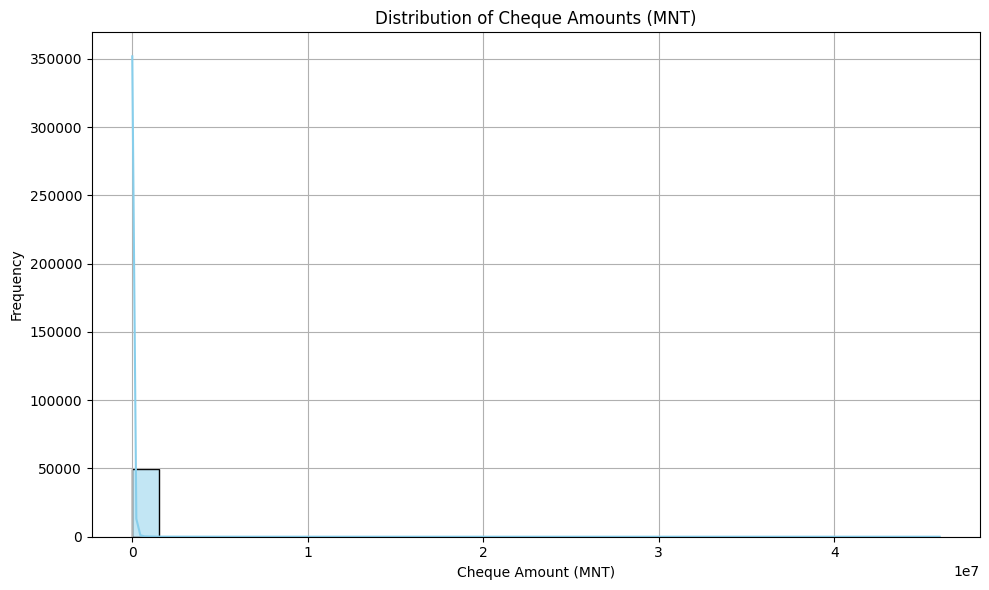

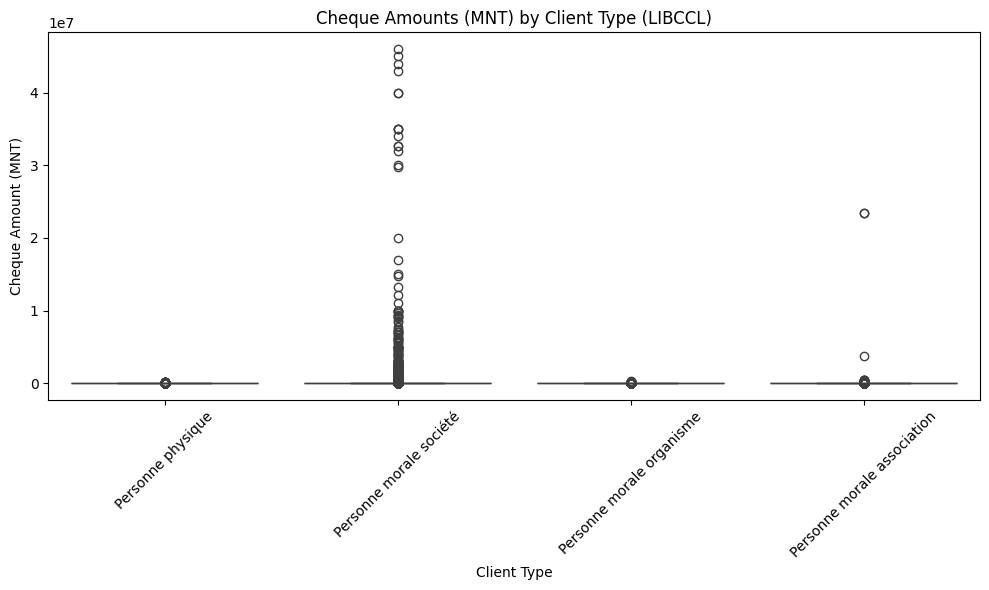

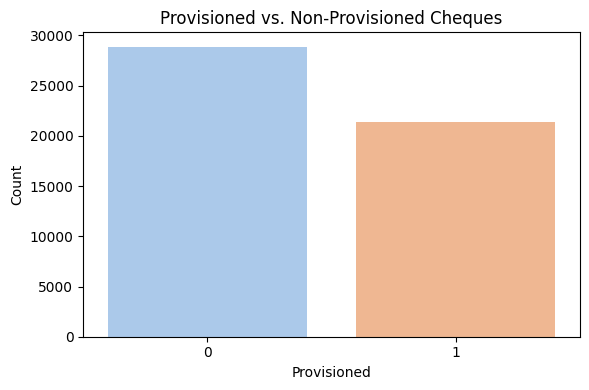

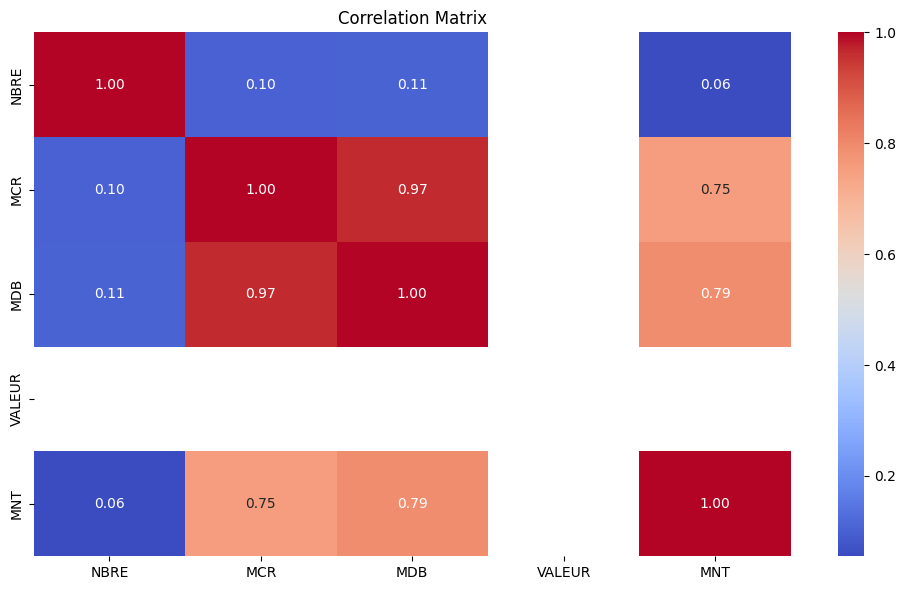

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of MNT
plt.figure(figsize=(10, 6))
sns.histplot(df['MNT'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Cheque Amounts (MNT)')
plt.xlabel('Cheque Amount (MNT)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Boxplot of MNT by LIBCCL
plt.figure(figsize=(10, 6))
sns.boxplot(x='LIBCCL', y='MNT', data=df)
plt.title('Cheque Amounts (MNT) by Client Type (LIBCCL)')
plt.xlabel('Client Type')
plt.ylabel('Cheque Amount (MNT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar chart of Provisioned vs Non-Provisioned Cheques
plt.figure(figsize=(6, 4))
sns.countplot(x='PROVISIONNE', data=df, palette='pastel')
plt.title('Provisioned vs. Non-Provisioned Cheques')
plt.xlabel('Provisioned')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap

numeric_cols = ['NBRE', 'MCR', 'MDB', 'VALEUR', 'MNT']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float) 

plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
# Sélectionner les variables explicatives (X) et la cible (y)
X = df[['NBRE', 'MCR', 'MDB', 'VALEUR', 'MNT', 'AGE', 'PROVISIONNE', 'le_PROFESSION', 'le_LIBCCL']]
y = df['SORT']

In [10]:
# Diviser les données en ensemble d'entraînement et de test, en stratifiant pour équilibrer les classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# client_table = cheque_overview[["ID","NBRE", "MCR", "MDB", "AGE", "PROFESSION", "LIBCCL"]]
# client_table.drop_duplicates(subset="ID", inplace=True)
# client_table.shape

# client_table.to_excel("data/client_table.xlsx", index=False)
